# Chicago Crime and Safety Analysis *(by Prashant)*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Initial data cleaning for all analysis

In [2]:
# d20 = pd.read_csv(path + '2020.csv')
d20 = pd.read_csv('crimes_chicago_2020.csv')

# parsing the date in datetime format
d20['Date'] = pd.to_datetime(d20['Date'], format="%m/%d/%Y %I:%M:%S %p")
d20.rename(columns={'Date':'date'},inplace=True)

# adding two new columns Date and Time
d20.insert(3,"Time",d20.date.dt.time)
d20.insert(3,"Date",d20.date.dt.date)

# Crime Resolve Time
d20['Updated On'] = pd.to_datetime(d20['Updated On'], format="%m/%d/%Y %I:%M:%S %p")
d20['Resolve Time in days'] = pd.DataFrame((d20['Updated On']-d20['date']).dt.days)

# V1. Correlation between a public event and crime increase in Chicago

### Hypotheses: High increase in crimes during Black Lives Matter protest in Chicago near downtown area. 

Steps : Find number of crime reported on particular date and geographical area and then look if there has been an event nearby.

Major dates in year 2020, for Black Lives Matter protest in Chicago were May 30th, May 31st and August 9 and 10th. These protests were dominant in mainly Chicago downtown area and its neighborhood. For example, BLM protest march on Magnificent Mile.

*Source link of above information’s are following*

1. George Floyd protests in Chicago - Wikipedia : https://en.wikipedia.org/wiki/George_Floyd_protests_in_Chicago

2. How the weekend unfolded: Timeline of Chicago protests, looting and unrest : https://www.chicagotribune.com/news/breaking/ct-viz-george-floyd-protest-chicago-timeline-20200531-lfkd7p6ejbennfezhxk2u5kkmm-story.html


**Analysis and observation:** First 2 plots (line plots) shows the unusual increase in crimes during BLM protest near downtown area. I have selected Police districts corresponding to that area and shown the total crimes nearby dates to BLM protest dates. The last 3 plots (Geospatial plots) show the reported crime locations on the BLM protest day.

**Conclusion**: High increase in reported crime on May 30th, May 31st and August 10th of year 2020 near downtown area is related to BLM protest event.

### Line Plots

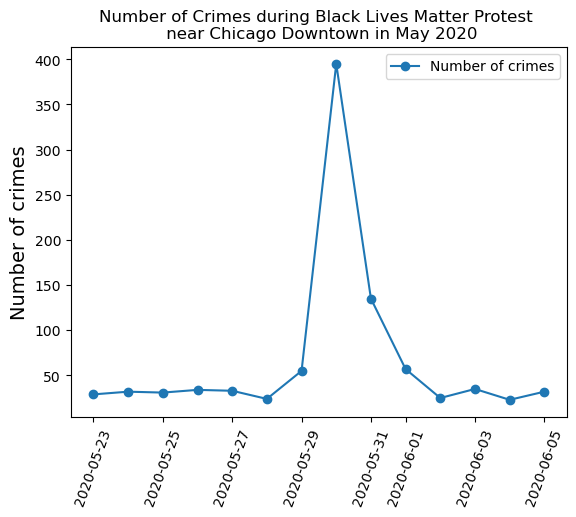

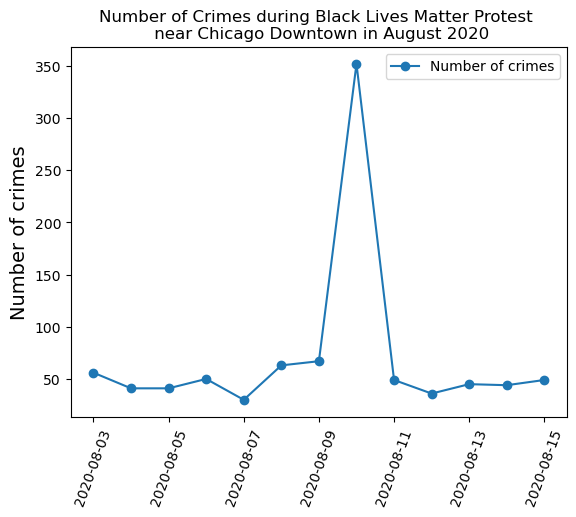

In [3]:
# filtering the data for downtown area around BLM protest day in may

df1 = d20[(d20["District"]==1) | (d20["District"]==18)][['Date','District']]
df1 = df1.loc[(df1['Date'].astype(str)>='2020-05-23') & (df1['Date'].astype(str)<='2020-06-05')]
df1 = df1.groupby('Date').count().reset_index()
df1.rename(columns={'District':'number_of_crimes'},inplace=True)

# lineplot
plt.plot(df1['Date'],df1['number_of_crimes'], 'o-', label='Number of crimes')
plt.title('Number of Crimes during Black Lives Matter Protest \n near Chicago Downtown in May 2020')
plt.legend()
plt.ylabel('Number of crimes', fontsize=14)
plt.xticks(rotation=70)
plt.show()

# filtering the data for downtown area around BLM protest day in August

df2 = d20[(d20["District"]==1) | (d20["District"]==18)][['Date','District']]
df2 = df2.loc[(df2['Date'].astype(str)>='2020-08-03') & (df2['Date'].astype(str)<='2020-08-15')]
df2 = df2.groupby('Date').count().reset_index()
df2.rename(columns={'District':'number_of_crimes'},inplace=True)

# lineplot
plt.plot(df2['Date'],df2['number_of_crimes'], 'o-', label='Number of crimes')
plt.title('Number of Crimes during Black Lives Matter Protest \n near Chicago Downtown in August 2020')
plt.legend()
plt.ylabel('Number of crimes', fontsize=14)
plt.xticks(rotation=70)
plt.show()

### Geospatial Plots

In [4]:
import folium

In [5]:
# filtering the crime data for downtown area on May 30th

df3 = d20[(d20["District"]==1) | (d20["District"]==18)]
df3 = df3.loc[df3["Date"].astype(str)=='2020-05-30'][['Latitude','Longitude']].dropna()
# df3


# geospatial_plot of crimes locations on May 30th

map = folium.Map(location=[df3.Latitude.mean(), df3.Longitude.mean()], zoom_start=14, control_scale=True)

for index, location_info in df3.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]],
                  icon=folium.Icon(color="red",icon="remove",prefix='glyphicon')).add_to(map)

title_html = '''
             <h3 align="center" style="font-size:20px"><b> Crimes spots during BLM Protest on May 30th 2020 </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
    
map

In [6]:
# filtering the crime data for downtown area on May 31st

df4 = d20[(d20["District"]==1) | (d20["District"]==18)]
df4 = df4.loc[df4["Date"].astype(str)=='2020-05-31'][['Latitude','Longitude']].dropna()
# df4


# geospatial_plot of crimes locations on May 31st

map = folium.Map(location=[df4.Latitude.mean(), df4.Longitude.mean()], zoom_start=14, control_scale=True)

for index, location_info in df4.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]],
                  icon=folium.Icon(color="red",icon="remove",prefix='glyphicon')).add_to(map)

title_html = '''
             <h3 align="center" style="font-size:20px"><b> Crimes spots during BLM Protest on May 31st 2020 </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
    
map

In [7]:
# filtering the crime data for downtown area on August 10th

df5 = d20[(d20["District"]==1) | (d20["District"]==18)]
df5 = df5.loc[df5["Date"].astype(str)=='2020-08-10'][['Latitude','Longitude']].dropna()
# df5


# geospatial_plot of crimes locations on August 10th

map = folium.Map(location=[df5.Latitude.mean(), df5.Longitude.mean()], zoom_start=14, control_scale=True)

for index, location_info in df5.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]],
                  icon=folium.Icon(color="red",icon="remove",prefix='glyphicon')).add_to(map)

title_html = '''
             <h3 align="center" style="font-size:20px"><b> Crimes spots during BLM Protest on August 10th 2020 </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
    
map

# V2. Analysis of Crime from types of location perspective

In [3]:
# Data Preparation

d = d20['Location Description'].value_counts().to_dict()


home_list_1 = [key for key in d.keys() if "RESIDENCE" in key][:-2]
home_list_2 = [key for key in d.keys() if "APARTMENT" in key]
home_list = home_list_1 + home_list_2

store_list = [key for key in d.keys() if "STORE" in key]

parking_list = [key for key in d.keys() if "PARKING" in key]

restaurant_hotel_list = ['RESTAURANT'] + [key for key in d.keys() if "HOTEL" in key]

cta_list = [key for key in d.keys() if "CTA" in key]
del cta_list[5]

school_list = [key for key in d.keys() if "SCHOOL" in key]
college_list = [key for key in d.keys() if "COLLEGE" in key]
school_college_list = ['LIBRARY'] + school_list + college_list

hospital_list = [key for key in d.keys() if "HOSPITAL" in key] + [key for key in d.keys() if "MEDICAL" in key]



dfp = pd.DataFrame(
    {'Location Description': [      
        'RESIDENCE/APARTMENT',
        'STREET',
        'STORE',
        'PARKING LOT',
        'RESTAURANT & HOTEL',
        'CTA',
        'SCHOOL & COLLEGE',
        'HOSPITAL',
        'BANK'
     ],
     'Number of Crime': [
         d20['Location Description'].isin(home_list).value_counts().iloc[1],
         d20['Location Description'].isin(['STREET']).value_counts().iloc[1],
         d20['Location Description'].isin(store_list).value_counts().iloc[1],
         d20['Location Description'].isin(parking_list).value_counts().iloc[1],
         d20['Location Description'].isin(restaurant_hotel_list).value_counts().iloc[1],
         d20['Location Description'].isin(cta_list).value_counts().iloc[1],
         d20['Location Description'].isin(school_college_list).value_counts().iloc[1],
         d20['Location Description'].isin(hospital_list).value_counts().iloc[1],
         d20['Location Description'].isin(['BANK']).value_counts().iloc[1]
     ]
    }
)
# dfp

In [4]:
import seaborn as sns
sns.set_style('whitegrid')

### Bar Plots

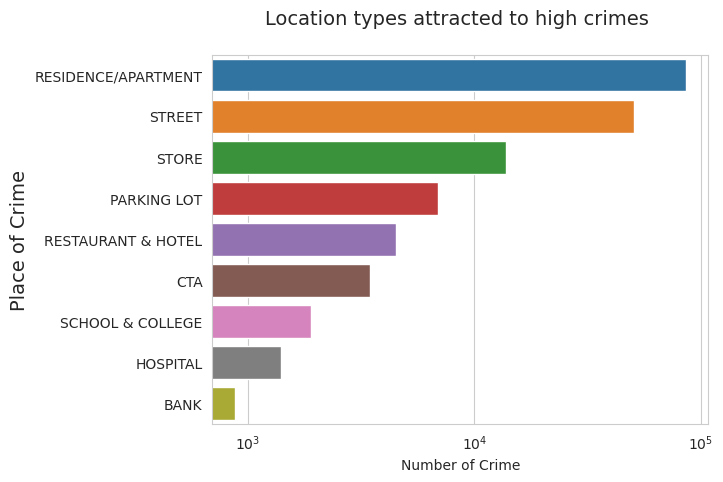

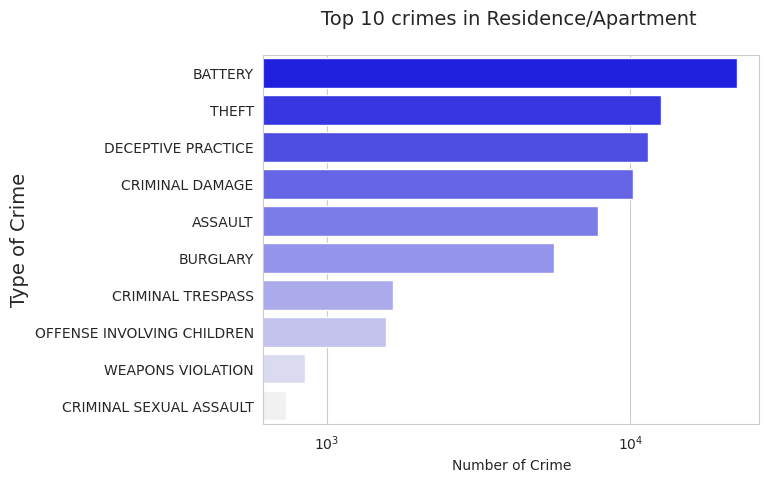

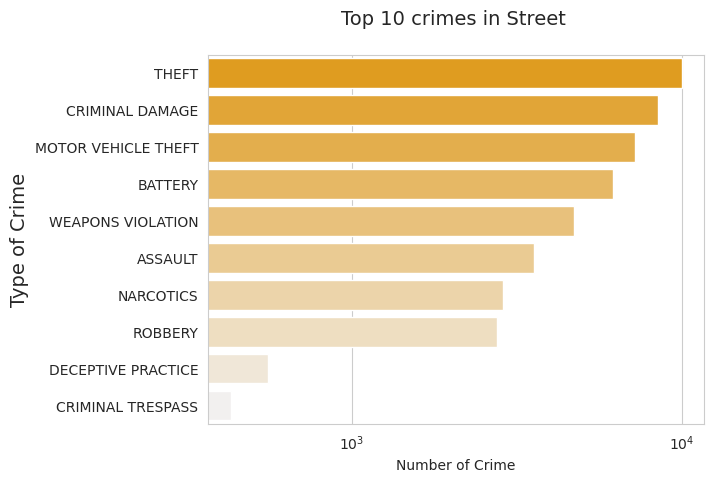

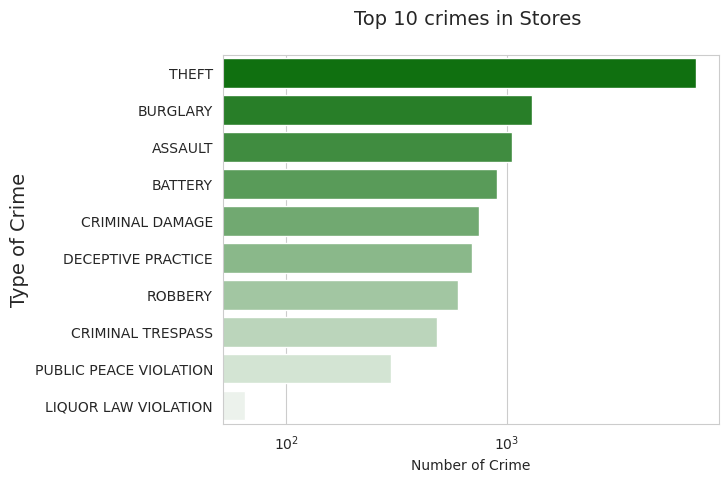

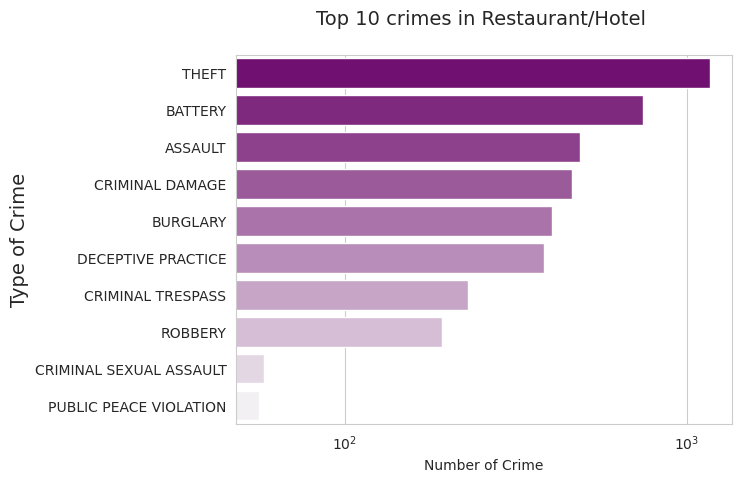

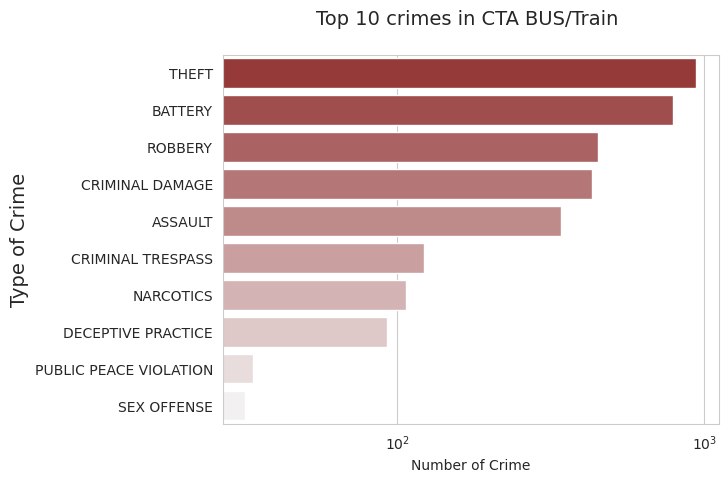

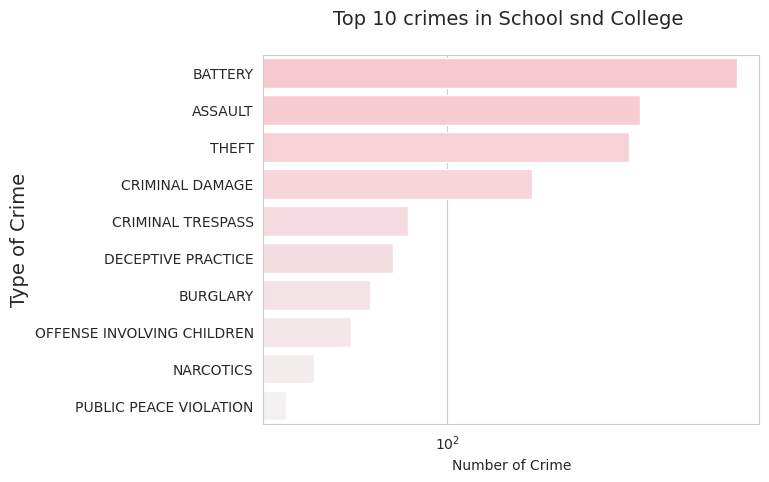

In [5]:
sns.barplot(data=dfp, x='Number of Crime', y='Location Description')
plt.xscale('log')
plt.ylabel('Place of Crime', fontsize=14)
plt.title('Location types attracted to high crimes \n ', fontsize=14)
plt.show()

df = d20[d20['Location Description'].isin(home_list)].groupby('Primary Type').count().sort_values('ID', ascending=False).drop('OTHER OFFENSE').reset_index()[['Primary Type','ID']]
df.rename(columns={'ID':'Number of Crime'},inplace=True)
df = df.head(10)
sns.barplot(data=df, x='Number of Crime', y='Primary Type',palette="light:b_r")
plt.xscale('log')
plt.ylabel('Type of Crime', fontsize=14)
plt.title('Top 10 crimes in Residence/Apartment \n ', fontsize=14)
plt.show()

df = d20[d20['Location Description'].isin(['STREET'])].groupby('Primary Type').count().sort_values('ID', ascending=False).drop('OTHER OFFENSE').reset_index()[['Primary Type','ID']]
df.rename(columns={'ID':'Number of Crime'},inplace=True)
df = df.head(10)
sns.barplot(data=df, x='Number of Crime', y='Primary Type',palette="light:orange_r")
plt.xscale('log')
plt.ylabel('Type of Crime', fontsize=14)
plt.title('Top 10 crimes in Street \n ', fontsize=14)
plt.show()

df = d20[d20['Location Description'].isin(store_list)].groupby('Primary Type').count().sort_values('ID', ascending=False).drop('OTHER OFFENSE').reset_index()[['Primary Type','ID']]
df.rename(columns={'ID':'Number of Crime'},inplace=True)
df = df.head(10)
sns.barplot(data=df, x='Number of Crime', y='Primary Type',palette="light:g_r")
plt.xscale('log')
plt.ylabel('Type of Crime', fontsize=14)
plt.title('Top 10 crimes in Stores \n ', fontsize=14)
plt.show()

df = d20[d20['Location Description'].isin(restaurant_hotel_list)].groupby('Primary Type').count().sort_values('ID', ascending=False).drop('OTHER OFFENSE').reset_index()[['Primary Type','ID']]
df.rename(columns={'ID':'Number of Crime'},inplace=True)
df = df.head(10)
sns.barplot(data=df, x='Number of Crime', y='Primary Type',palette="light:purple_r")
plt.xscale('log')
plt.ylabel('Type of Crime', fontsize=14)
plt.title('Top 10 crimes in Restaurant/Hotel \n ', fontsize=14)
plt.show()

df = d20[d20['Location Description'].isin(cta_list)].groupby('Primary Type').count().sort_values('ID', ascending=False).drop('OTHER OFFENSE').reset_index()[['Primary Type','ID']]
df.rename(columns={'ID':'Number of Crime'},inplace=True)
df = df.head(10)
sns.barplot(data=df, x='Number of Crime', y='Primary Type',palette="light:brown_r")
plt.xscale('log')
plt.ylabel('Type of Crime', fontsize=14)
plt.title('Top 10 crimes in CTA BUS/Train \n ', fontsize=14)
plt.show()

df = d20[d20['Location Description'].isin(school_college_list)].groupby('Primary Type').count().sort_values('ID', ascending=False).drop('OTHER OFFENSE').reset_index()[['Primary Type','ID']]
df.rename(columns={'ID':'Number of Crime'},inplace=True)
df = df.head(10)
sns.barplot(data=df, x='Number of Crime', y='Primary Type',palette="light:pink_r")
plt.xscale('log')
plt.ylabel('Type of Crime', fontsize=14)
plt.title('Top 10 crimes in School snd College \n ', fontsize=14)
plt.show()

**Observations**

I tried to understand what types of places are more attracted by offenders to commit crime. The first plot shows major location types prone to crimes with decreasing order of number of crimes. We notice that Residential areas, street, store are major location types where crime takes place. This suggest that we are most unsafe in our home or where we live. We should take care of our home security very seriously.

For our further understanding I break-down the data into specific location type and looked at major crime types that occurred in that location.

Crimes in Residence/Apartment
Battery : We should have something in our home to protect ourselves from physical offence. Don't open the door to a stranger.
Theft : Strengthen our home security for example, have multiple locks in exit doors and put camera(CCTV) to watch.
Criminal Damage : Fence our home boundaries.

Theft is the highest occurred crime in Street, Stores, Restaurant and in CTA. Therefore, we should be aware of our belongings. To reduce the risk of Motor Vehicle theft in streets, we can have lock in our vehicle and park it in a safe place.

In school battery and assault are two major crimes which is serious concern as we usually do not carry any tool to protect but to gain knowledge. Crime in School and college should be reduced by effort by respective administrative authority through campus guidelines and discipline as well as police.
 

**Conclusion :** Police does try to reduce the crime, however, we should also be aware of crimes and saves ourselves from being its victim. Moreover, reducing crime and supporting its victim is our collective responsibility as residence of Chicago.


# V3. Major crimes committed by our own family member

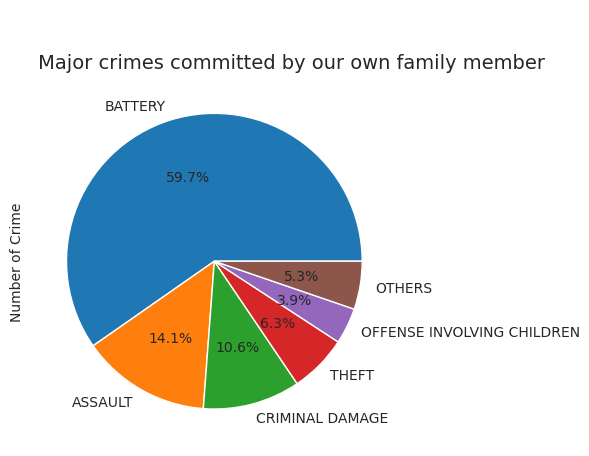

In [7]:
pd.options.mode.chained_assignment = None

df = d20[d20['Domestic']==True].groupby('Primary Type').count().sort_values('ID', ascending=False).drop('OTHER OFFENSE').reset_index()[['Primary Type','ID']]
df.rename(columns={'ID':'Number of Crime'},inplace=True)
dft = df.T
dft.columns = dft.iloc[0]
dft = dft.drop('Primary Type')
dfv3 = dft.iloc[:,:5]
dfv3.loc[:,'OTHERS'] = dft.iloc[0,5:].sum()
# dfv3
dfv3.loc['Number of Crime'].plot(kind = 'pie', autopct='%1.1f%%', radius=1)
plt.title(' \n \n Major crimes committed by our own family member', fontsize=14, x=0.7)
plt.show()

Domestic crimes are one of major concern as these crimes are committed by our own family members. We need to feel safe at least in our home and from our own family. I tried to understand the top 5 types of crime an offender commit against their own family member.

**Observation :** 

**Top 5 type of Domestic crimes**

1.Battery : Act of harm via unlawful offensive physical contact

2.Assault : Threaten to harm via unlawful offensive physical contact

3.Criminal Damage : Damage caused to any type of property

4.Theft : Act of taking another person's property or services without that person's permission

5.Offense involving children 

**Conclusion :** Unfortunately three fourth of the domestic crimes are offensive physical contact which is a severe crime and great concern for safety our society. Offense involving children contribute to 4% which might may look less but even 4% is a lot as children don't even know that they have been victim of a crime so many may have not been reported. Moreover, most of the time they couldn't defend themselves against crimes. Though criminal damage and theft do not include life threat or physical damage to a human body, sometimes it can cause a great monetary loss, therefore, police should take these crimes seriously.


# V4. Chicago Police efficiency on solving crime cases

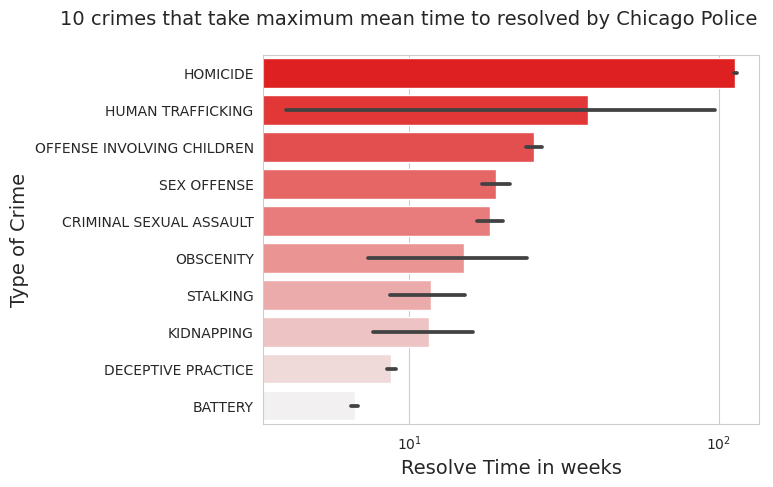

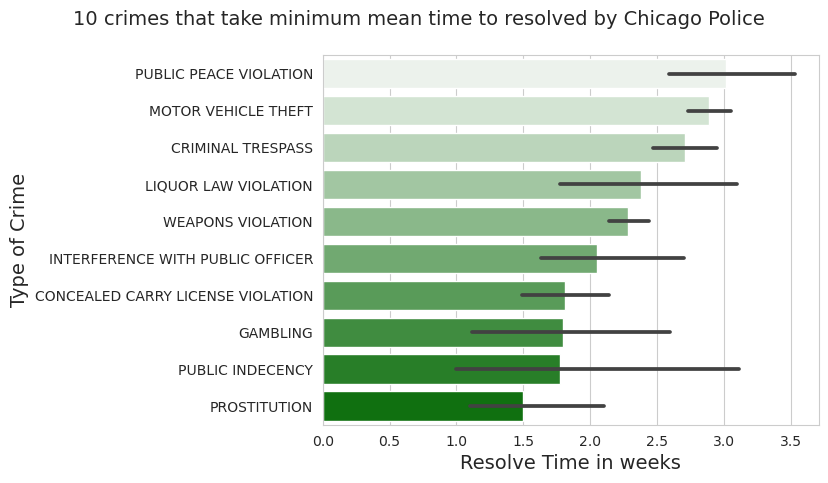

In [32]:
# Data Prepation

df = d20[['Primary Type','Resolve Time in days']]
df = df.apply(lambda x: np.round(x/7,0) if x.name == 'Resolve Time in days' else x)
df.rename(columns={'Resolve Time in days':'Resolve Time in weeks'},inplace=True)
dfv4 = df.groupby('Primary Type').mean().sort_values('Resolve Time in weeks', ascending=False).drop('OTHER OFFENSE').reset_index()



# Crimes that take maximum mean time

sns.barplot(data=df, y='Primary Type', x='Resolve Time in weeks', palette='light:r_r', order=dfv4['Primary Type'][:10].to_list())
plt.xscale('log')
plt.ylabel('Type of Crime', fontsize=14)
plt.xlabel('Resolve Time in weeks', fontsize=14)
plt.title('10 crimes that take maximum mean time to resolved by Chicago Police \n ', fontsize=14,  x=0.3)
plt.show()


# Crimes that take minimum mean time

sns.barplot(data=df, y='Primary Type', x='Resolve Time in weeks', palette='light:g', order=dfv4['Primary Type'][-12:-2].to_list())
# plt.xscale('log')
plt.ylabel('Type of Crime', fontsize=14)
plt.xlabel('Resolve Time in weeks', fontsize=14)
plt.title('10 crimes that take minimum mean time to resolved by Chicago Police \n ', fontsize=14,  x=0.2)
plt.show()

**Observation :** 

Homicide, Offense Involving Children, Sex Offense and Criminal Sexual Assault are very serious crimes; therefore, it takes a lot of time to resolve these cases. However, for Homicide there is still room for improvement as it takes more than 100 weeks, implies more than 2 years. Bringing it down to a year should be our target. Human trafficking do require a lot of time due to its uncontrolled complexities, moreover, it depends greatly on case by case which is also reflected by huge variation in our plot.

**Conclusion :** Chicago police is committed and active in solving crimes in the city and data suggest that Chicago Police have been fairly quick in solving crimes such as Criminal Trespass, Liquor Law Violation, Weapons Violation and Gambling. BATTERY being the most common crime in Chicago; takes 4 weeks to solve reflect commitment of police to maintain peace in city.

# Machine Learning Model Using Decision Tree Classifier

I made a machine learning model to predict the time taken by Police to resolve a reported crime case, if type of crime and Beat of Police station is known. This can help which Beat of the police station is performing good and which one need special attention and resources. 
I have used the Decision Tree Classifier algorithm to build this model and the model has prediction accuracy of 72% which is good. However, this can be increased by including crime data of many years. 

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
# Data Preparation

d20 = d20.dropna()
dfml = d20[['Beat', 'Primary Type', 'Resolve Time in days']]
dfml = dfml.apply(lambda x: np.round(x/7,0) if x.name == 'Resolve Time in days' else x)
dfml.rename(columns={'Resolve Time in days':'Resolve Time in weeks'},inplace=True)
dfml['Primary Type'] = LabelEncoder().fit_transform(dfml['Primary Type'])
dfml['Beat'] = LabelEncoder().fit_transform(dfml['Beat'].astype(str))
# dfml

# Training and testing data spliting

X = dfml.drop(columns=['Resolve Time in weeks'])
y = dfml['Resolve Time in weeks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model training

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predication and model's accuracy analysis
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.7193910837259877